Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


2021-09-04 18:57:05.269675: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-04 18:57:05.269771: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gilgamesh-18): /proc/driver/nvidia/version does not exist
2021-09-04 18:57:05.270284: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.
2021-09-04 18:57:05.335659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


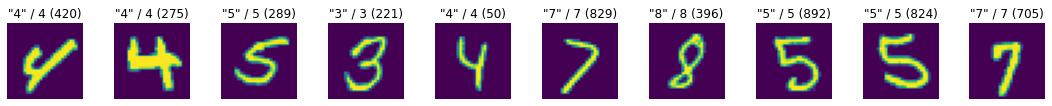

2021-09-04 18:57:09.725678: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to .data/cifar10/3.0.2. Subsequent calls will reuse this data.


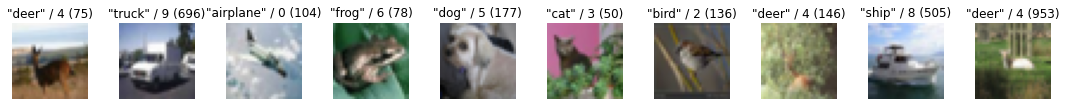

In [1]:
def fetch_tfds_as_np(name, split):
    import operator
    import numpy as np
    import tensorflow_datasets as tfds

    X, Y = operator.itemgetter("image", "label")(
        tfds.as_numpy(tfds.load(name=name, split=split,
                                data_dir=".data/", batch_size=-1)))
    X = X.astype(np.float64) / 255
    return X, Y


def fetch_tfds_info(name):
    import tensorflow_datasets as tfds

    _, info = tfds.load(name=name, split="train[:1]", data_dir=".data/",
                        batch_size=-1, with_info=True)
    return info.features["label"].names


def show_image_d(X, Y, names=None, samples=(1, 10)):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(samples[1] * 1.5, samples[0] * 1.5))
    for i in range(samples[0]):
        for j in range(samples[1]):
            idx = np.random.randint(len(Y))
            plt.subplot(*samples, i * samples[1] + j + 1)
            plt.imshow(np.clip(X[idx], 0, 1))
            plt.title("\"{}\" / {} ({})".format(
                Y[idx] if names is None else names[Y[idx]], Y[idx], idx))
            plt.axis("off")
    plt.tight_layout()
    plt.show()


show_image_d(*fetch_tfds_as_np("mnist", "train[:1024]"))
show_image_d(*fetch_tfds_as_np("cifar10", "train[:1024]"),
             fetch_tfds_info("cifar10"))


In [2]:
def flatten_XY(X, Y):
    import numpy as np
    return np.reshape(X, (X.shape[0], -1)), Y


def calc_svc_acc(svc, X, Y):
    import numpy as np
    return np.count_nonzero(Y == svc.predict(X)) / len(Y)


def print_svc_acc_grid_c(dataset_name, **kwargs):
    import numpy as np
    from sklearn import svm

    print(dataset_name, kwargs, [
        "{:.2E}: {:.4f}".format(i, calc_svc_acc(svm.SVC(C=i, **kwargs).fit(
            *flatten_XY(*fetch_tfds_as_np(dataset_name, "train[:512]"))),
            *flatten_XY(*fetch_tfds_as_np(dataset_name, "test[:128]"))))
        for i in np.logspace(-5, 5, num=10)
    ])


print_svc_acc_grid_c("mnist", gamma="scale")
print_svc_acc_grid_c("cifar10", gamma="scale")


mnist {'gamma': 'scale'} ['1.00E-05: 0.1328', '1.29E-04: 0.1328', '1.67E-03: 0.1328', '2.15E-02: 0.1328', '2.78E-01: 0.8359', '3.59E+00: 0.8906', '4.64E+01: 0.8906', '5.99E+02: 0.8906', '7.74E+03: 0.8906', '1.00E+05: 0.8906']
cifar10 {'gamma': 'scale'} ['1.00E-05: 0.1328', '1.29E-04: 0.1328', '1.67E-03: 0.1328', '2.15E-02: 0.1328', '2.78E-01: 0.2578', '3.59E+00: 0.3516', '4.64E+01: 0.3359', '5.99E+02: 0.3359', '7.74E+03: 0.3359', '1.00E+05: 0.3359']


In [3]:
print_svc_acc_grid_c("mnist", kernel="linear")
print_svc_acc_grid_c("cifar10", kernel="linear")


mnist {'kernel': 'linear'} ['1.00E-05: 0.1328', '1.29E-04: 0.1328', '1.67E-03: 0.6484', '2.15E-02: 0.8516', '2.78E-01: 0.8672', '3.59E+00: 0.8672', '4.64E+01: 0.8672', '5.99E+02: 0.8672', '7.74E+03: 0.8672', '1.00E+05: 0.8672']
cifar10 {'kernel': 'linear'} ['1.00E-05: 0.1328', '1.29E-04: 0.1953', '1.67E-03: 0.2812', '2.15E-02: 0.3125', '2.78E-01: 0.3281', '3.59E+00: 0.3281', '4.64E+01: 0.3281', '5.99E+02: 0.3281', '7.74E+03: 0.3281', '1.00E+05: 0.3281']


In [4]:
print_svc_acc_grid_c("mnist", degree=4, kernel="poly")
print_svc_acc_grid_c("cifar10", degree=4, kernel="poly")


mnist {'degree': 4, 'kernel': 'poly'} ['1.00E-05: 0.1328', '1.29E-04: 0.1328', '1.67E-03: 0.1328', '2.15E-02: 0.2344', '2.78E-01: 0.6172', '3.59E+00: 0.8047', '4.64E+01: 0.8203', '5.99E+02: 0.8203', '7.74E+03: 0.8203', '1.00E+05: 0.8203']
cifar10 {'degree': 4, 'kernel': 'poly'} ['1.00E-05: 0.1328', '1.29E-04: 0.1797', '1.67E-03: 0.2266', '2.15E-02: 0.2734', '2.78E-01: 0.3438', '3.59E+00: 0.3047', '4.64E+01: 0.3125', '5.99E+02: 0.3125', '7.74E+03: 0.3125', '1.00E+05: 0.3125']
